# T04. Detecția F0 în domeniul timp

În cadrul acestui tutorial vom introduce metode de estimare a **frecvenței fundamentale** a semnalului vocal în domeniul timp. Aceste metode se bazează strict pe analiza periodicității formei de undă.

# Frecvența fundamentală a vorbirii

Într-un tutorial anterior am prezentat modelele de producere a semnalului vocal și componentele fiziologice ce intervin în vorbire. Totodată, am determinat și caracteristicile și clasificările segmentelor vocale în funcție de diverși factori. Printre cele mai importante clasificări, se află și cea de clasificare a semnalelor în sonor-nesonor. Aceasta se referă la prezența sau absența periodicității semnalului și este determinată de utilizarea sau nu a corzilor vocale în modularea fluxului de aer în timpul vorbirii.

**Corzile vocale** reprezintă două pliuri simetrice ale membranei laringelui. În timpul fonației, înălțimea sunetului rezultat este controlată de poziția acestor pliuri și de gradul de închidere/deschidere a orificiului delimitat de ele. Periodicitatea sunetului este însă dată de vibrația liberă a unui segment al corzilor vocale și nu de mișcarea controlată a acestora cu ajutorul mușchilor conecși așa cum este de cele mai multe ori considerat.

Această oscilație a corzilor vocale determină periodicitatea semnalului vocal pe segmentele sonore. Măsura obiectivă a acestei periodicități este definită de **frecvența fundamentală (F0)**. Segmentele sonore din vorbire sunt în principal fonemele vocalice (de ex. pentru limba română, ”a”, ”ă”, ”â”, ”e”, ”i”, ”o” și ”u”). În limba engleză, însă, există o diferență între termenii ”pitch” și ”fundamental frequency”. ”Pitch” se referă la frecvența fundamentală percepută, iar ”fundamental frequency” se referă la frecvența fundamentală obiectiv calculată din semnalul vocal. Această diferență vine, printre altele și din faptul că, dacă într-un semnal audio se înlătură primele câteva armonici, frecvența percepută de ascultător va fi tot cea fundamentală, deși în spectru aceasta nu este prezentă, timbrul sunetului fiind însă ușor diferit.

Astfel că, vom defini **frecvența fundamentală (F0)** ca fiind frecvența de oscilație a corzilor vocale și cea mai joasă frecvență prezentă în spectrul semnalului vocal. Deoarece frecvența fundamentală este rezultatul caracteristicilor fiziologice ale unei persoane, valoarea sa medie variază de la un vorbitor la altul, iar diferențe majore există și între categoriile de vorbitori. La femei, valoarea medie a F0 este de aproximativ 210Hz, iar la bărbați este de 120Hz. În cazul copiilor, valoare medie F0 urcă până la 300Hz. A nu se face confunzia între F0 din timpul vorbirii cu cea din timpul cântatului. Un cântăreț trebuie să modifice constant frecvența fundamentală pentru a putea reda notele muzicale.

În cadrul aplicațiilor de prelucrare de voce, frecvența fundamentală este extrem de importantă, iar cei mai mulți algoritmi de codare a semnalului vocal sau de procesare tratează în mod independent fluxul de date F0 față de răspunsul tractului vocal. Determinarea cu acuratețe a F0 devine astfel un domeniu de studiu larg, iar metodele de determinare a acestei frecvențe sunt multiple. De exemplu, în cadrul codorului CELP (Code Excited Linear Prediction) utilizat în codarea GSM, posibilitatea estimării F0 folosind un set redus de impulsuri face ca această codare să fie extrem de eficientă.

# Detecția frecvenței fundamentale în domeniul timp

Datorită caracterului cvasi-periodic al semnalelor sonore, cele mai simple metode de determinare a F0 din semnalul vocal se referă la estimarea acestei periodicități din forma de undă. **Periodicitatea** unui semnal este dată de intervalul de timp după care valorile eșantioanelor semnalului se repetă. Acest interval este denumit perioada semnalului ($T_0$) și este egală cu $1/F_0$. Cel mai simplu exemplu de semnal periodic este o funcție sinus. Spunem însă că semnalul vocal este cvasi-periodic deoarece chiar și în segmentele sonore, datorită fenomenelor de coarticulare (trecerea de la un fonem la altul și modificarea poziției tractului vocal în acest proces), periodicitatea semnalului nu este pură, existând oarecare diferențe între perioade consecutive ale sale.

Având toate aceste informații la dispoziție, să încercăm sp determinăm periodicitatea semnalului vocal pornind doar de la forma de undă a acestuia. În primul rând, pentru comparație, vom citi două segmente vocale, o consoană și o vocală.

In [1]:
import wave
import numpy as np

######################
# Citim o vocală
######################
input_wav_vowel = 'speech_files/a.wav'
wav_struct_vowel = wave.open(input_wav_vowel, 'r')

# Frecvența de eșantionare
sampling_frequency_vowel = wav_struct_vowel.getframerate()

# Eșantioanele semnalului
wav_bytes_vowel = wav_struct_vowel.readframes(-1)

# Conversie la valori întregi
wav_data_vowel = np.frombuffer(wav_bytes_vowel, dtype='int16')

# Normalizare a datelor în intervalul [-1,1]
wav_data_vowel = wav_data_vowel/float(max(abs(wav_data_vowel)))

# Închidem fluxul de intrare
wav_struct_vowel.close()


######################
# Citim  o consoană
######################
input_wav_consonant = 'speech_files/s.wav'
wav_struct_consonant = wave.open(input_wav_consonant, 'r')

# Frecvența de eșantionare
sampling_frequency_consonant = wav_struct_consonant.getframerate()

# Eșantioanele semnalului 
wav_bytes_consonant = wav_struct_consonant.readframes(-1)

# Conversie la valori întregi
wav_data_consonant = np.frombuffer(wav_bytes_consonant, dtype='int16')

# Nomalizare a datelor în intervalul [-1,1]
wav_data_consonant = wav_data_consonant/float(max(abs(wav_data_consonant)))

# Închidem fluxul de intrare
wav_struct_consonant.close()

Afișăm și ascultăm datele:

Duration 0.253063 second
Duration 0.139250 second


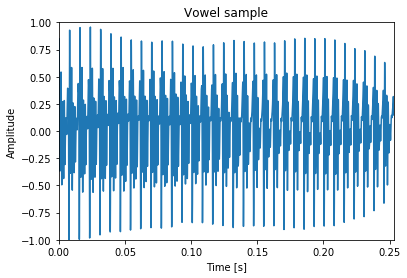

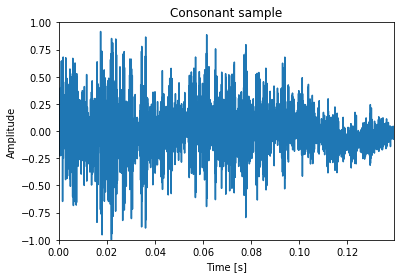

In [2]:
import matplotlib.pylab as pl
%matplotlib inline


######################
# Plot vocală
######################

# Durata semnalului
duration_vowel = len(wav_data_vowel)*1.00/sampling_frequency_vowel
print ("Duration %f second" %duration_vowel)

time_axis_vowel = np.arange(0, len(wav_data_vowel))*1.00/sampling_frequency_vowel
pl.plot(time_axis_vowel, wav_data_vowel)
pl.xlim([0, duration_vowel])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Vowel sample" )

######################
# Plot consoană
######################

# Durata semnalului
duration_consonant = len(wav_data_consonant)*1.00/sampling_frequency_consonant
print ("Duration %f second" %duration_consonant)


pl.figure()
time_axis_consonant = np.arange(0, len(wav_data_consonant))*1.00/sampling_frequency_consonant
pl.plot(time_axis_consonant, wav_data_consonant)
pl.xlim([0, duration_consonant])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Consonant sample");

In [3]:
import IPython
IPython.display.Audio(wav_data_vowel, rate=sampling_frequency_vowel)

In [4]:
IPython.display.Audio(wav_data_consonant, rate=sampling_frequency_consonant)

Să vizualizăm câteva cadre individuale din cele 2 semnale:

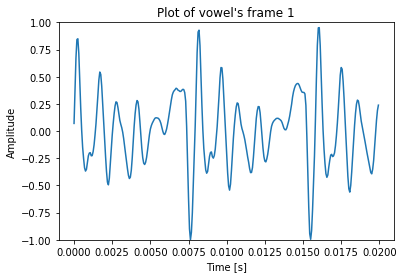

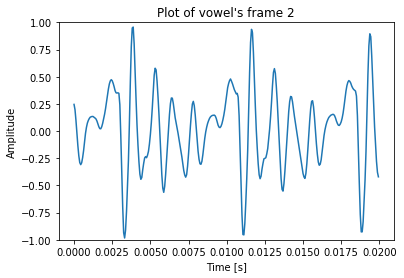

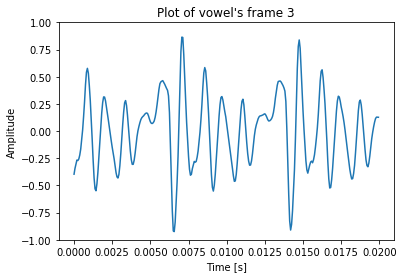

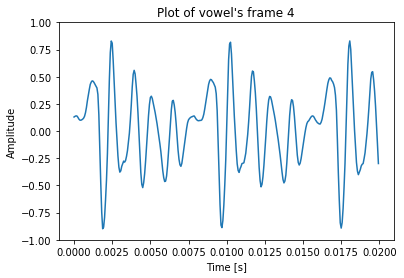

In [5]:
##############################
# Cadrele vocalei
##############################

# Fereastra de analiză de 20msec fără suprapunere
window_length_vowel = int(20*1e-3*sampling_frequency_vowel)
p = 0

# Calculăm numărul de cadre
number_of_frames_vowel = int(len(wav_data_vowel)/((1-p)*window_length_vowel))

# Variabila pentru axa timpului
time_axis_vowel = np.arange(0, window_length_vowel)*1.00/sampling_frequency_vowel

# Afișăm doar primele 4 cadre
for k in range(4):
    current_frame = wav_data_vowel[int(k*(1-p))*window_length_vowel: int((k*(1-p)+1))*window_length_vowel]
    pl.figure()
    pl.plot(time_axis_vowel, current_frame)
    pl.ylim([-1, 1])
    pl.xlabel('Time [s]')
    pl.ylabel('Amplitude')
    pl.title("Plot of vowel's frame %i" %(k+1))

Din ploturile de mai sus putem observa că forma de undă este cvasi-periodică și că perioada sa fundamentală (T0) este în jur de 0.0075 secunde. Aceasta înseamnă că frecvența fundamentală este egală cu:

> $F_0 = \frac{1}{T_0} = \frac{1}{0.0075} \approx 133 [Hz] $

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">A. Schimbați semnalul de intrare la <i>speech_files/e.wav</i> .
    </td>
</tr>
</table>

In [6]:
###################
##YOUR CODE HERE
###################

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex3.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">B. Se mai poate determina F0 folosind doar forma de undă?
    </td>
</tr>
</table>

>Răspunsul vostru aici...

Și acum vizualizăm consoana:

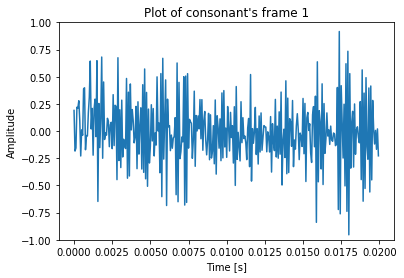

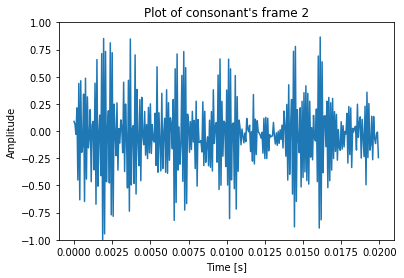

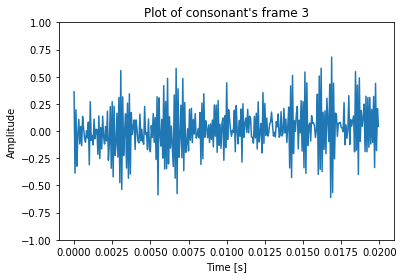

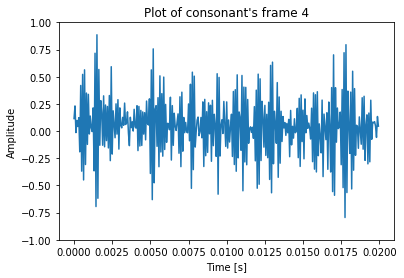

In [7]:
#################################
# Cadrele consoanei
#################################

# Fereastra de analiză de 20msec fără suprapunere
window_length_consonant = int(20*1e-3*sampling_frequency_consonant)
p = 0

# Calculăm numărul de cadre
number_of_frames_consonant = int(len(wav_data_consonant)/((1-p)*window_length_consonant))

# Variabila pentru axa timpului
time_axis_consonant = np.arange(0, window_length_consonant)*1.00/sampling_frequency_consonant

# Afișăm doar primele 4 cadre
for k in range(4):
    current_frame = wav_data_consonant[int(k*(1-p)*window_length_consonant):int((k*(1-p)+1)*window_length_consonant)]
    
    pl.figure()
    pl.plot(time_axis_consonant, current_frame)
    pl.ylim([-1, 1])
    pl.xlabel('Time [s]')
    pl.ylabel('Amplitude')
    pl.title("Plot of consonant's frame %d" %(k+1))

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">C. Se poate determina perioada fundamentală sau F0 în cazul consoanei?
    </td>
</tr>
</table>

>Răspunsul vostru aici...

Următoarele secțiuni vor prezenta două funcții diferite utilizate pentru a estima periodicitatea (sau lipsa acesteia) unui semnal vocal, precum și metode de îmbunătățire a estimării $F_0$.

## Funcția de autocorelație

**Funcția de autocorelație** este definită ca:

>$r(m) = \frac{1}{N}\sum_{n=1}^{N-m}{x(n)*x(n+m)},\ m=\overline{1,N} $

și poate fi folosită pentru a determina dacă un semnal este periodic prin calcularea similarității semnalului cu versiuni întârziate ale sale. Dacă semnalul este periodic cu perioada $m$, valoarea similarității la întârzierea $t=m$ va avea un maxim.

Funcția de mai jos implementează această formulă și returnează valoarea funcției de autocorelație pentru un semnal de intrare:

In [8]:
def compute_autocorrelation(input_frame):
    sample_length =  len(input_frame)
    autocor = np.zeros(sample_length)
    for m in range(sample_length):
        for j in range(sample_length-m):
            autocor[m] += input_frame[j]*input_frame[j+m]
    return 1.0/sample_length * autocor

O alternativă este să utilizăm funcția disponibilă în modulul NumPy și de a reține doar ultima jumătate a valorilor acesteia, funcția fiind simetrică:

In [9]:
def compute_autocorrelation_2(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

Să afișăm valorile funcției de autocorelație pentru semnalele citite. Vom folosi o fereastră de analiză de 40msec pentru a vizualiza mai bine maximele funcției:

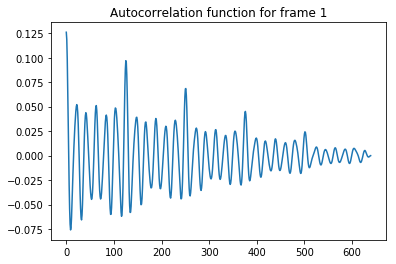

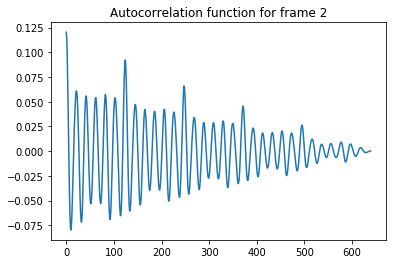

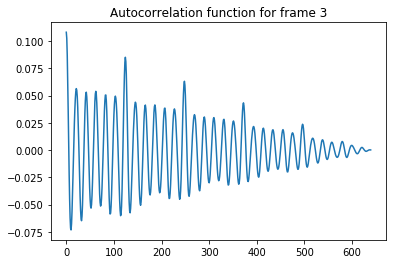

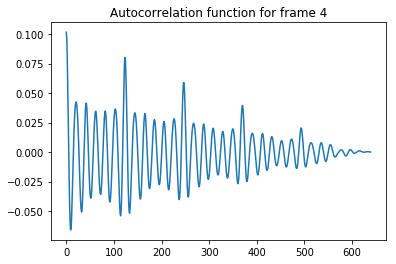

In [10]:
# Fereastra de 40msec
window_length_vowel = int(40*1e-3*sampling_frequency_vowel)
p = 0

# Numărul de cadre de analiză
number_of_frames = int(len(wav_data_vowel)/window_length_vowel)

# Calculăm funcția de autocorelație pentru primele 4 cadre
for k in range(4):
    current_frame = wav_data_vowel[int(k*(1-p)*window_length_vowel):int((k*(1-p)+1)*window_length_vowel)]
    frame_autocor = compute_autocorrelation(current_frame)
    pl.figure()
    pl.plot(frame_autocor)
    pl.title('Autocorrelation function for frame %d' %(k+1))

Uitându-ne la definiția funcției de autocorelație, precum și la ploturi, ar trebui să fie evident faptul că funcția prezintă maxime la intervale egale cu perioada fundamentală ($T_{0}$).

Pentru a determina $F_0$, trebuie să identificăm aceste maxime și să le convertim în domeniul frecvență ($Hz$).

Trebuie menționăt faptul că funcția de autocorelație este o funcție de timp și că valorile indicate de maxime pentru semnale discrete sunt multipli ai perioadei de eșantionare $T_s$. Astfel că, ploturile de mai sus ar trebui să aibă timpul ca unitate de măsură pe axa oX.

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">D. Afișați funcția de autocorelație pentru câteva cadre ale vocalei folosind timpul ca unitate de măsură pe axa oX
    </td>
</tr>
</table>

In [11]:
###################
##YOUR CODE HERE
###################

Vom urma un exemplu pentru ca lucrurile să fie mai clare:

Să presupunem că frecvența de eșantionare este de 16kHz, fiecare valoare a funcție de autocorelație reprezintă o întârziere egală cu 

>$1/16000 = 62.5$ nanosecunde.

Să presupunem că primul maxim al funcției este observat la indexul 110. Aceasta înseamnă că perioada fundamentală a cadrului analizat este:

>$index*1/F_{s} = 110 * 1/16000 = 6.875$ microsecunde   

de unde rezultă:

>$F_{0} = 1/T_{0}=16000/110\approx 146\ Hz$

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">E. Ce valoare are $F_0$ pentru vocala citită estimat de pe grafic?
    </td>
</tr>
</table>

>Răspunsul vostru aici...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">F. Modificați lungimea ferestrei de analiză și examinați rezultatele. Folosiți valorile: 32, 128, 512, 1024, 2048. Se modifică valoarea $F_0$?
    </td>
</tr>
</table>

In [12]:
###################
##YOUR CODE HERE
###################

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">G. Există vreo restricție asupra lungimii ferestrei de analiză determinată de funcția de autocorelație sau $F_0$?
    </td>
</tr>
</table>


>Răspunsul vostru aici...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex4.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">H. Având un set de semnale eșantionate la 16kHz și știind că valorile $F_0$ pentru majoritatea vorbitorilor sunt curprinse între 50-400Hz, calculați durata minimă a ferestrei de analiză, astfel încât funcția de autocorelație să prezinte cel puțin 2 maxime.
    </td>
</tr>
</table>

>Răspunsul vostru aici...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex3.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">I. Afișați funcția de autocorelație și pentru consoană.
    </td>
</tr>
</table>

In [13]:
###################
##YOUR CODE HERE
###################

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex3.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">J. Se poate determina $F_0$ acum? Ce valoare are?
    </td>
</tr>
</table>

>Răspunsul vostru aici...

## AMDF 


Funcția **Average Magnitude Difference Function  (AMDF)** este definită ca:

>$AMDF(m) = \frac{1}{N}\sum_{n=1}^{N-m}{\left | x(n)-x(n+m) \right |},\ m=\overline{1,N} $

Se poate observa că în loc de înmulțirea versiunilor întârziate ale semnalului, funcția AMDF calculează diferența în modul ale acestor întărzieri. În practică acest lucru este foarte util în calculul $F_0$ pe dispozitive cu resurse limitate unde se dorește evitarea complexității calculului operațiilor de înmulțire mult mai complexe din punct de vedere computațional.

Implementăm și funcția AMDF:

In [14]:
def compute_amdf(input_frame):
  sample_length =  len(input_frame)
  amdf = np.zeros(len(input_frame))
  for m in range(sample_length):
    for j in range(sample_length-m):
      amdf[m] += abs(input_frame[j] - input_frame[j+m])
  return 1.00/sample_length*amdf

Afișăm funcția AMDF aplicată asupra primelor 4 cadre de semnal: 

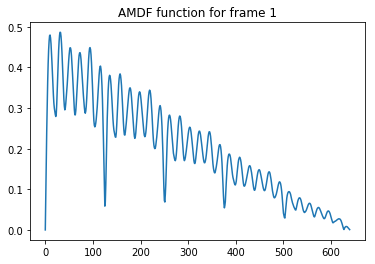

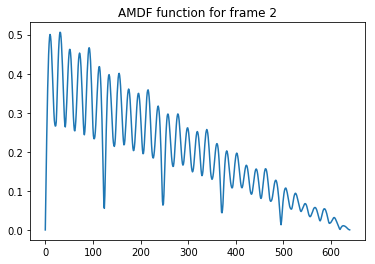

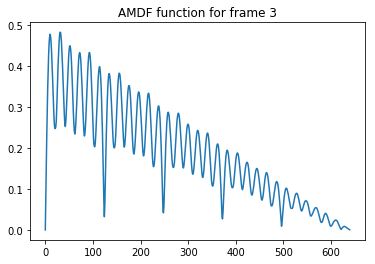

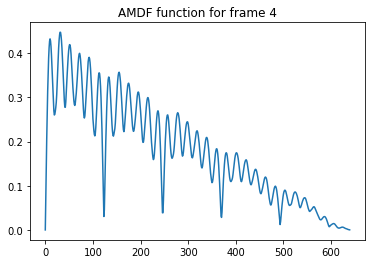

In [15]:
window_length_consonant = int(40*1e-3*sampling_frequency_consonant)
p = 0
number_of_frames = int(len(wav_data_vowel)/window_length_vowel)

for k in range(4):
    current_frame = wav_data_vowel[int(k*(1-p)*window_length_vowel):int((k*(1-p)+1)*window_length_vowel)]
    frame_amdf = compute_amdf(current_frame)
    pl.figure()
    pl.plot(frame_amdf)
    pl.title('AMDF function for frame %d' %(k+1))

Primul lucru ce poate fi observat este că în loc de maxime, funcția AMDF va prezenta **minime** distanțate cu $T_0$. Putem, din nou, să estimăm valoarea $F_0$ în mod similar cu cea estimată din funcția de autocorelație.

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">L. Care este valoarea $F_0$ calculată din funcția AMDF?
    </td>
</tr>
</table>

>Răspunsul vostru aici...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex3.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">M. Afișați funcția AMDF pentru primele cadre din consoană. Se pot determina minime periodice?
    </td>
</tr>
</table>

In [16]:
###################
##YOUR CODE HERE
###################

# Detecția automată a $F_0$

Folosind funcțiile de autocorelație și AMDF am putut să detectăm valorile $F_0$ mult mai ușor decât din forma de undă a semnalului. Dar detecția a fost realizată manual. Această  metodă nu este eficientă atunci când dorim să calculăm frecvența fundamentală a mai multor semnale vocale. Astfel că, avem nevoie de o metodă automată de calcul a $F_0$ pornind de la maximele sau minimele funcțiilor prezentate anterior.

O valoare maximă locală a unei funcții poate fi detectată automat prin compararea valorii ei cu cele din imediata vecinătate. Definim o funcție ce determină indicii maximelor locale dintr-un vector de valori:

In [17]:
def peak_detection_1(sample):
    # Există întotdeauna un maxim în origine pentru autocorelație
    indices = [0]
    for i in range(1,len(sample)-1):
        # Comparăm valoarea curentă cu vecinii
        if (sample[i] > sample[i-1]) and (sample[i] > sample[i+1]):
            indices.append(i)
    return indices

Aplicăm algoritmul asupra câtorva cadre de semnal:

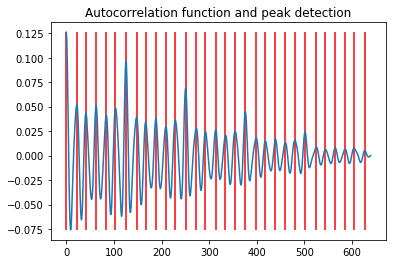

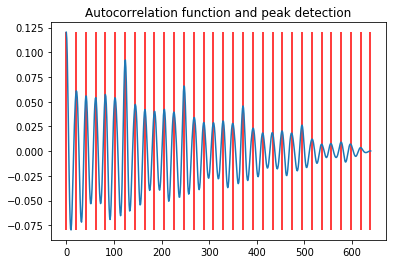

In [18]:
for k in range(2):
    current_frame = wav_data_vowel[int(k*(1-p)*window_length_vowel):int((k*(1-p)+1)*window_length_vowel)]
    frame_autocor = compute_autocorrelation(current_frame)
    indices = peak_detection_1(frame_autocor)
    # afișăm rezultatele
    pl.figure()
    pl.plot(frame_autocor)
    pl.title('Autocorrelation function and peak detection')
    pl.vlines(indices, min(frame_autocor), max(frame_autocor), 'r');
    

Se pare că am detectat prea multe maxime. Ceea ce nu specificat în funcția de detecție a maximelor este că dorim doar cele mai ”mari” maxime. Rescriem funcția:

In [19]:
def peak_detection_2(sample):
    local_max = []
    local_max_ind = []
    indices = [0]
    
    for i in range(1,len(sample)-1):
        if (sample[i] > sample[i-1]) and (sample[i] > sample[i+1]):
            
            # Stocăm valorile și indecșii maximelor locale
            local_max_ind.append(i)
            local_max.append(sample[i])
    
    # Parcurgem restul maximelor și îl determinăm pe următorul cu 
    # valoarea cea mai mare după cel din origine
    i = 1
    while i < len(local_max):
        next_max = np.argmax(local_max[i:])
        indices.append(local_max_ind[next_max+i])
        i = i+next_max+1
        
    return indices

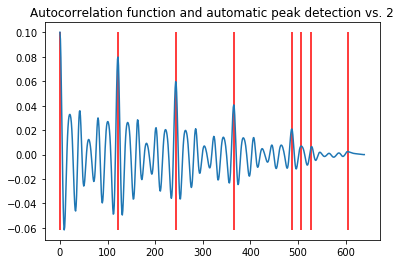

In [20]:
# vizualizăm un singur cadru de semnal
k = 4
current_frame = wav_data_vowel[int(k*(1-p)*window_length_vowel):int((k*(1-p)+1)*window_length_vowel)]
frame_autocor = compute_autocorrelation(current_frame)
indices = peak_detection_2(frame_autocor)
# afișăm rezultatele
pl.figure()
pl.plot(frame_autocor)
pl.title('Autocorrelation function and automatic peak detection vs. 2')
pl.vlines(indices, min(frame_autocor), max(frame_autocor), 'r');

Arată mai bine!


Dar putem rafina funcție de mai sus ținând cont de valorile minime și maxime pe care $F_0$ le poate avea. Am menționat anterior că acestea pot fi în intervalul $[55, 450]Hz$. 
Să vedem ce înseamnă aceasta în eșantioane ale funcției de autocorelație. Ne reamintim faptul că fiecare eșantion de semnal este distanțat cu $T_s = \frac{1}{F_s}$ secunde. 

Un sinus de 50Hz va avea nevoie de $N$ eșantioane pentru a realiza un ciclu complet. Valoarea $N$ depinde de frecvența de eșantionare. Să calculăm mai întâi perioada unui sinus de 50Hz:

>$F_0 = 50$ Hz

>$T_0 = \frac{1}{50} = 20$ msec

Știind frecvența de eșantionare 
>$F_s = 16kHz$, 

perioada de eșantionare este:

>$T_s = \frac{1}{Fs} = 62.5$ microseconds. 



Astfel că pentru $T_0=20$ msec (perioada sinusului de 50Hz) avem nevoie de 

>$N = \frac{20*10^{-3}}{62.5*10^{-6}} = 320 $ samples.

Să simplificăm ecuația de mai sus pentru a o putea utiliza pe viitor:

>$N = \frac{\frac{1}{F_0}}{\frac{1}{F_s}} = \frac{F_s}{F_0}$


Dar pentru 450Hz? Avem nevoie de:

>$N = \frac{16000}{450} \approx 35 $ samples

Aceasta înseamnă că dacă dorim să calculăm un $F_0$ maxim de 450Hz, maximele funcției de autocorelație vor fi la cel puțin 35 de eșantioane distanță, pentru un semnal eșantioant la 16kHz. Iar pentru un semnal cu $F_0$ de 50Hz, maximele vor fi distanțate cu 320 de eșantioane. Ca urmare, fereastra de analiză aleasă pentru calculul funcției de autocorelație sau AMDF trebuie să țină cont de aceste extreme.

Introducem această condiție în funcția de calcul a maximelor:

In [21]:
def peak_detection_3(sample, sampling_frequency, max_F0):
    local_max = [sample[0]]
    local_max_ind = [0]
    indices = [0]
    
    min_peak_distance = sampling_frequency//max_F0
    
    for i in range(1,len(sample)-1):
        if sample[i] > sample[i-1] and sample[i] > sample[i+1]:
            local_max_ind.append(i)
            local_max.append(sample[i])

    i = 1
    while i < len(local_max):
        next_max = np.argmax(local_max[i:])
    
        if local_max_ind[i+next_max] - local_max_ind[i-1] > min_peak_distance:
            indices.append(local_max_ind[next_max+i])
        i = i+next_max+1
    
    return indices

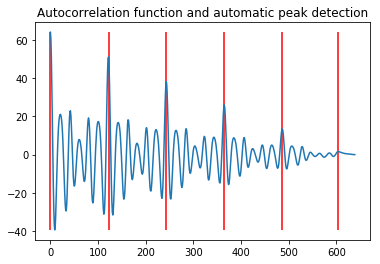

In [22]:
# Luăm doar un cadru de analiză
k = 4
current_frame = wav_data_vowel[int(k*(1-p)*window_length_vowel):int((k*(1-p)+1)*window_length_vowel)]
frame_autocor = compute_autocorrelation_2(current_frame)
indices = peak_detection_3(frame_autocor, sampling_frequency_vowel, 450)


pl.figure()
pl.plot(frame_autocor)
pl.title('Autocorrelation function and automatic peak detection')
pl.vlines(indices, min(frame_autocor), max(frame_autocor), 'r');

Acum că știm poziția maximelor în funcția de autocorelație, putem să calculăm automat valoarea lui $F_0$:

In [23]:
# un cadru de analiză
k = 4
current_frame = wav_data_vowel[int(k*(1-p)*window_length_vowel):int((k*(1-p)+1)*window_length_vowel)]
frame_autocor = compute_autocorrelation(current_frame)
indices = peak_detection_3(frame_autocor, sampling_frequency_vowel, 450)

# Calculăm distanța dintre indecșii returnați de funcție:
difs = [x-indices[i-1] for i,x in enumerate(indices)][1:]

# Determinăm media diferențelor
average_dist = np.mean(difs[:3])

# Și o convertim în Hz
F0 = sampling_frequency_vowel/average_dist 

print ("\nThe F0 value for frame no. %d is: %.2f Hz\n" %(k,F0))


The F0 value for frame no. 4 is: 131.51 Hz



<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex3.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">N. Calculați valoarea $F_0$ pentru același cadru de vorbire folosind un software extern (de ex. Praat)? Sunt similare valorile?
    </td>
</tr>
</table>

>Răspunsul vostru aici...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex5.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">O. Implementați funcția ce determină minimele funcției AMDF și recalculați $F_0$.</td>
</tr>
</table>

In [24]:
###################
##YOUR CODE HERE
###################

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex5.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">P. Înregistrați-vă pronunțând vocalele din limba română și calculați valoarea F0 medie pentru fiecare dintre ele.
    </td>
</tr>
</table>

# Îmbunătățirea algoritmilor de detecție ai $F_0$

Ce se întâmplă cu algoritmii anteriori dacă adăugăm zgomot? Codul de mai jos adaugă zgomot alb gaussian peste semnalul de intrare și recalculează funcția de autocorelație:

In [41]:
# Citim un fișier cu zgomot
noise_file =  'speech_files/noise.wav'
noise_struct = wave.open(noise_file, 'r')
noise_sampling_frequency = noise_struct.getframerate()
noise_bytes = noise_struct.readframes(len(wav_data_vowel))
noise_data = np.frombuffer(noise_bytes, dtype='int16')
noise_struct.close()

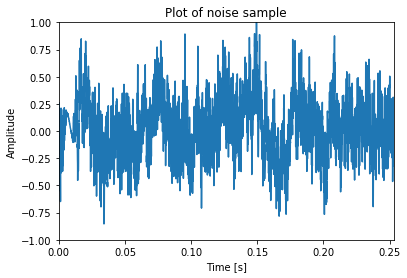

In [42]:
# Normalizăm noise_data la [-1,1] and și îl ponderăm
# pentru a nu acoperi semnalul de intrare în întregime
noise_data = noise_data/float(max(abs(noise_data)))

# Afișăm semnalul de zgomot
time_axis = np.arange(0, len(noise_data))*1.00/noise_sampling_frequency
pl.plot(time_axis, noise_data)
pl.xlim([0, time_axis[-1]])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title('Plot of noise sample');

In [43]:
import IPython
IPython.display.Audio(noise_data, rate=noise_sampling_frequency)

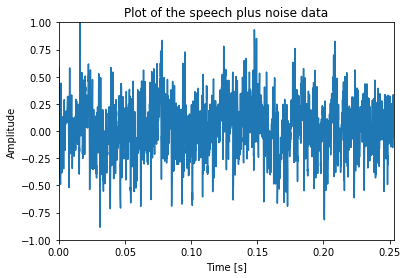

In [44]:
# Adăugăm zgomotul peste semnalul vocal
noisy_speech = wav_data_vowel[:len(wav_data_vowel)] + noise_data
noisy_speech = noisy_speech/float(max(abs(noisy_speech)))
# Axa timpului
time_axis = np.arange(0, len(noisy_speech))*1.00/noise_sampling_frequency

# Afișăm semnalul rezultat
pl.plot(time_axis, noisy_speech)
pl.xlim([0, time_axis[-1]])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Plot of the speech plus noise data");

Din forma de undă a semnalului cu zgomot nu mai putem acum să determinăm periodicitatea și probabil am fi înclinați să spunem că acest cadru de analiză aparține unei consoane. Să-l ascultăm, însă și să vedem dacă funcția de autocorelație funcționează și în acest caz:

In [45]:
IPython.display.Audio(noisy_speech, rate=noise_sampling_frequency)

Recalculăm funcția de autocorelație și valoarea lui $F_0$:


The F0 value for the frame no. 4 is: 131.51 Hz



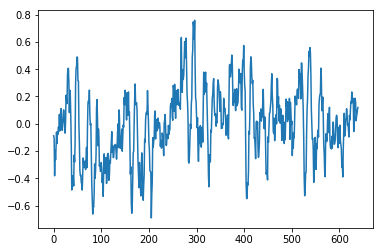

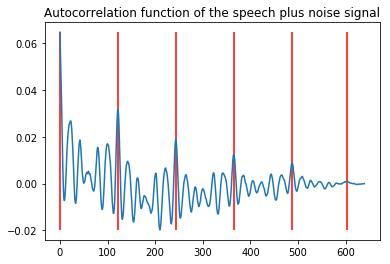

In [46]:
k = 4
current_frame = noisy_speech[int(k*(1-p)*window_length_vowel):int((k*(1-p)+1)*window_length_vowel)]
frame_autocor = []
frame_autocor = compute_autocorrelation(current_frame)
indices = peak_detection_3(frame_autocor, noise_sampling_frequency, 450)
difs = [x-indices[i-1] for i,x in enumerate(indices)][1:]
average_dist = np.mean(difs[:3])

# Calcul F0 în Hz
F0 = sampling_frequency_vowel/average_dist 

print ("\nThe F0 value for the frame no. %d is: %.2f Hz\n" %(k,F0))

# Plot 
pl.figure()
pl.plot(current_frame)
pl.figure()
pl.plot(frame_autocor)
pl.title('Autocorrelation function of the speech plus noise signal')
pl.vlines(indices, min(frame_autocor), max(frame_autocor), 'r');

Se poate observa că, deși forma de undă nu mai este periodică în mod evident, funcția de autocorelație reușește să extragă periodicitatea semnalului. Pentru a îmbunăți rezultatele funcției de autocorelație, se pot aplica o serie de pre-procesări ale semnalului, astfel încât maximele parazite din autocorelație să fie reduse, iar valoarea $F_0$ calculată să fie cât mai apropiată de valoarea reală.

## Filtrarea trece jos

Dacă încercăm să determinăm o valoare a lui $F_0$ ce se află sub 450Hz, aceasta înseamnă că restul informației din banda de frecvențe superioară poate fi ignorată. Deci putem filtra semnalul trece-jos și să îmbunătățim astfel performanțele algoritmului de detecție al frecvenței fundamentale. Vom implementa un astfel de filtru și vom recalcula valoarea lui $F_0$:

In [47]:
# Proiectăm un filtru trece jos cu frecvența de tăiere la 400Hz
from scipy.signal import lfilter, butter
# Frecvența de tăiere
cutoff = 400
# Ordinul filtrului
order = 5
# Frecvența Nyquist
nyq = 0.5 * sampling_frequency_vowel
# Normalizăm frecvența de tăiere
normal_cutoff = cutoff / nyq
# Calculăm coeficienții unui filtru Butterworth de tip trece-jos
b, a = butter(order, normal_cutoff, btype='low', analog=False)
# Filtrăm datele
filtered_data = lfilter(b, a, wav_data_vowel)

Și afișăm rezultatele:

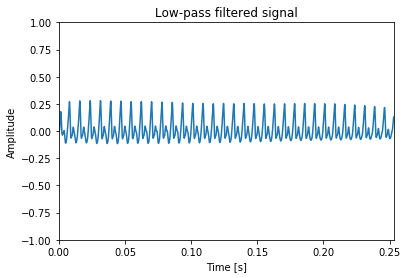

In [48]:
time_axis_filtered = np.arange(0, len(filtered_data))*1.00/sampling_frequency_vowel
pl.plot(time_axis_filtered, filtered_data)
pl.title('Low-pass filtered signal')
pl.xlim([0, time_axis_filtered[-1]])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude');

Putem să și ascultăm semnalul filtrat:

In [33]:
IPython.display.Audio(filtered_data, rate=sampling_frequency_vowel)


Și să-l comparăm cu cel original:

In [34]:
IPython.display.Audio(wav_data_vowel, rate=sampling_frequency_vowel)

Iar acum putem să calculăm funcția de autocorelație pentru semnalul filtrat

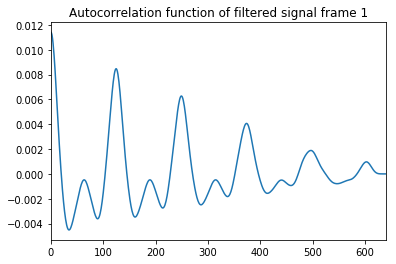

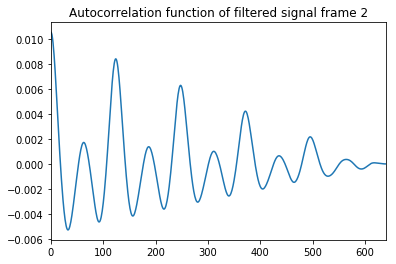

In [35]:
for k in range(2):
    current_frame = filtered_data[k*window_length_vowel: (k+1)*window_length_vowel]
    frame_autocor = compute_autocorrelation(current_frame)
    
    pl.figure()
    pl.plot(frame_autocor)
    pl.xlim([0, window_length_vowel])
    pl.title('Autocorrelation function of filtered signal frame %d' %(k+1))
    pl.show()

Maximele parazite din funcția de autocorelație au dispărut parțial și putem să determinăm iar $F_0$:


The F0 value for frame no. 4 is: 131.51 Hz



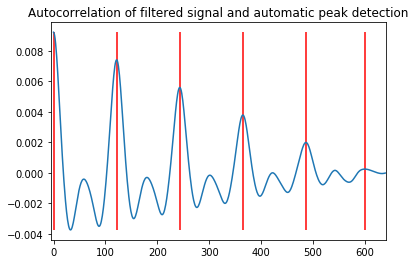

In [36]:
# Luăm un singur cadru de vorbire
k = 4
p=0
current_frame = filtered_data[int(k*(1-p)*window_length_vowel):int((k*(1-p)+1)*window_length_vowel)]
frame_autocor = compute_autocorrelation(current_frame)
indices = peak_detection_3(frame_autocor, sampling_frequency_vowel, 450)

difs = [x-indices[i-1] for i,x in enumerate(indices)][1:]
average_dist = np.mean(difs[:3])

# Convertim în Hz
F0 = sampling_frequency_vowel/average_dist 

pl.figure()
pl.plot(frame_autocor)
pl.xlim([-5, window_length_vowel])
pl.title('Autocorrelation of filtered signal and automatic peak detection')
pl.vlines(indices, min(frame_autocor), max(frame_autocor), 'r')

print ("\nThe F0 value for frame no. %d is: %.2f Hz\n" %(k,F0))

## Limitarea semnalului  (Metoda Center Clipping)

O altă metodă de reducere a maximelor parazite din funcția de autocorelație se bazează pe **funcția de center clipping**. Aceasta este este definită ca:

>$y(n) = clc[x(n)] = \left\{\begin{matrix} x(n) - C_{L}, & x(n)\geq C_{L} \\  0, & \left | x(n)) \right | < C_{L} \\ x(n) + C_{L}, & x(n) \leq -C_{L} \end{matrix}\right.$

Unde $C_{L}$ este pragul de limitare ce este de obicei setat la 30% din amplitudinea maximă a semnalului.

http://notedetection.weebly.com/center-clipping.html

Interpretarea funcției spune că toate eșantioanele ce au valori sub pragul $C_L$ vor fi setate la 0, iar restul vor fi calculate conform definiției de mai sus. Implementăm și noi această funcție:

In [37]:
def center_clipping(input_frame, cl_percentage):
    cl = cl_percentage * max(abs(input_frame))
    clipped_signal = np.zeros(len(input_frame))
    for i in range(len(input_frame)):
        if input_frame[i] >= cl:
            clipped_signal[i] = input_frame[i] - cl
        elif input_frame[i] <= -cl:
            clipped_signal[i] = input_frame[i] + cl
        elif abs(input_frame[i]) < cl:
            clipped_signal[i] = 0
    return clipped_signal

Și o aplicăm asupra semnalului înainte de a calcula autocorelația:

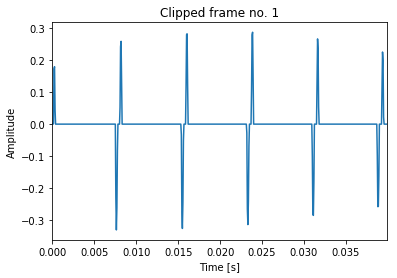

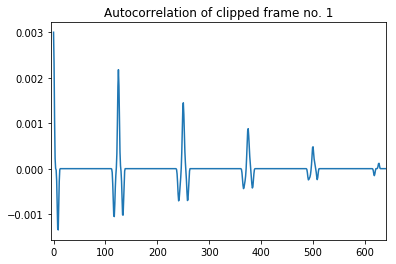

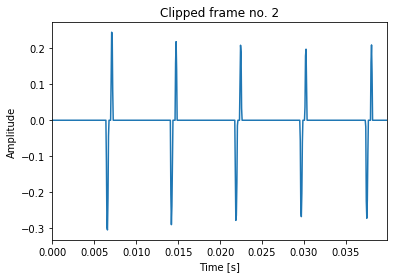

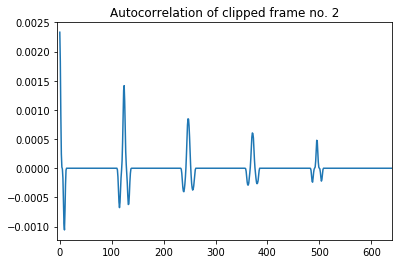

In [38]:
limiting_threshold = 0.7*max(wav_data_vowel)
time_axis_clipped = np.arange(0, window_length_vowel)*1.00/sampling_frequency_vowel

for k in range(2):
    current_frame = wav_data_vowel[k*window_length_vowel: (k+1)*window_length_vowel]
    
    clipped_frame = center_clipping(current_frame, limiting_threshold)
    clipped_frame_autocor = compute_autocorrelation(clipped_frame)
    
    # Afișăm cadrul după center clipping
    pl.figure()
    pl.plot(time_axis_clipped, clipped_frame)
    pl.xlim([0, time_axis_clipped[-1]])
    pl.xlabel('Time [s]')
    pl.ylabel('Amplitude')
    pl.title('Clipped frame no. %d' %(k+1))
    
    # Afișăm autocorelația cadrului
    pl.figure()
    pl.plot(clipped_frame_autocor)
    pl.xlim([-5, window_length_vowel])
    pl.title('Autocorrelation of clipped frame no. %d' %(k+1))

Calculăm și valorile efective ale $F_0$:


The F0 value for frame no. 4 is: 131.51 Hz



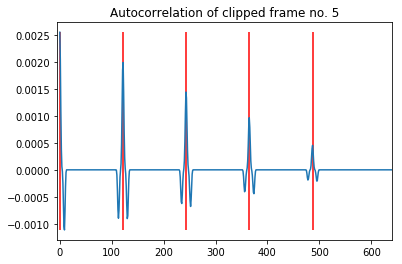

In [39]:
# luăm un singur cadru
k = 4

current_frame = wav_data_vowel[k*window_length_vowel: (k+1)*window_length_vowel]
clipped_frame = center_clipping(current_frame, limiting_threshold)
clipped_frame_autocor = compute_autocorrelation(clipped_frame)

# calculăm F0 din semnalul limitat
indices = peak_detection_3(clipped_frame_autocor, sampling_frequency_vowel, 450)


difs = [x-indices[i-1] for i,x in enumerate(indices)][1:]
average_dist = np.mean(difs[:3])
F0 = sampling_frequency_vowel/average_dist 

pl.figure()
pl.plot(clipped_frame_autocor)
pl.xlim([-5, window_length_vowel])
pl.title('Autocorrelation of clipped frame no. %d' %(k+1))    
pl.vlines(indices, min(clipped_frame_autocor), max(clipped_frame_autocor), 'r')

print ("\nThe F0 value for frame no. %d is: %.2f Hz\n" %(k,F0))

Se poate observa faptul că maximele din funcția de autocorelație sunt acum mult mai bine evidențiate.

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex5.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">Q. Variați pragul de limitare de la 0.1 la 0.9 din valoarea maximă și vizualizați rezultatul.
    </td>
</tr>
</table>

In [40]:
###################
##YOUR CODE HERE
###################

# Concluzii

În acest tutorial am încercat să determinăm periodicitatea semnalului vocal folosind forma de undă a acestuia și două funcții simple. Pe baza acestora am putut calcula automat valorile frecvenței fundamentale ale fiecărui segment vocal.

Într-un tutorial viitor vom încerca să determină frecvența fundamentală folosind reprezentarea în frecvență a semnalului vocal. Această reprezentare este mult mai robustă la zgomot și ne oferă o serie de alte informații privind periodicitatea semnalului în ansamblul ei.